In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('all_stocks_5yr.csv')

In [4]:
df.info

<bound method DataFrame.info of               date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]>

In [6]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [7]:
df.dtypes

## 2 categorical columns

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [8]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [14]:
median = df['open'].median()
df['open'] = df['open'].fillna('median')


In [15]:
df['new_open'].isnull().sum()

np.int64(0)

In [16]:
median = df['high'].median()
df['high'] = df['high'].fillna('median')

In [17]:
median = df['low'].median()
df['low'] = df['low'].fillna('median')

In [18]:
df.isnull().sum()

date        0
open        0
high        0
low         0
close       0
volume      0
Name        0
new_open    0
dtype: int64

In [26]:
categorical = [features for features in df.columns if df[features].dtypes=='O']

print(categorical)

['date', 'open', 'high', 'low', 'Name', 'new_open']


In [27]:
df['date'].unique()

array(['2013-02-08', '2013-02-11', '2013-02-12', ..., '2018-02-05',
       '2018-02-06', '2018-02-07'], dtype=object)

In [30]:
df['open'].unique()

array([15.07, 14.89, 14.45, ..., 44.879, 53.4747, 72.405], dtype=object)

In [31]:
df['high'].unique()

array([15.12, 15.01, 14.51, ..., 64.2776, 65.525, 72.9128], dtype=object)

In [33]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [34]:
## I'm not sure if this is gonna affect it as it represents the name of company trading the stocks/security
 

df['low'].unique()

array([14.63, 14.26, 14.1, ..., 70.995, 71.465, 73.1607], dtype=object)

In [35]:
## these are object but tbh they should be numerical as they're just fucking numbers so like I just need to convert them


df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['open'] = pd.to_numeric(df['open'], errors='coerce')

In [36]:
df.dtypes

date         object
open        float64
high        float64
low         float64
close       float64
volume        int64
Name         object
new_open     object
dtype: object

In [38]:
df = df.drop(['new_open'], axis=1)

In [39]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
df['date']

0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 619040, dtype: datetime64[ns]

In [46]:
df['date'].min()

## as the date is in the date time format and not numerical, I'm just gonna do the time since the first day of the data

Timestamp('2013-02-08 00:00:00')

In [47]:
## defining a reference date
reference_date = pd.to_datetime('2013-02-08')

## calculating difference in days
df['days_since_first'] = (df['date'] - reference_date).dt.days

In [48]:
df['days_since_first']

0            0
1            3
2            4
3            5
4            6
          ... 
619035    1819
619036    1820
619037    1823
619038    1824
619039    1825
Name: days_since_first, Length: 619040, dtype: int64

In [49]:
df = df.drop(['date'], axis=1)

In [51]:
df = df.drop(['Name'], axis=1)

In [52]:
df.head()

,open,high,low,close,volume,days_since_first
0,15.07,15.12,14.63,14.75,8407500,0
1,14.89,15.01,14.26,14.46,8882000,3
2,14.45,14.51,14.10,14.27,8126000,4
3,14.30,14.94,14.25,14.66,10259500,5
4,14.94,14.96,13.16,13.99,31879900,6


In [53]:
df.dtypes

open                float64
high                float64
low                 float64
close               float64
volume                int64
days_since_first      int64
dtype: object

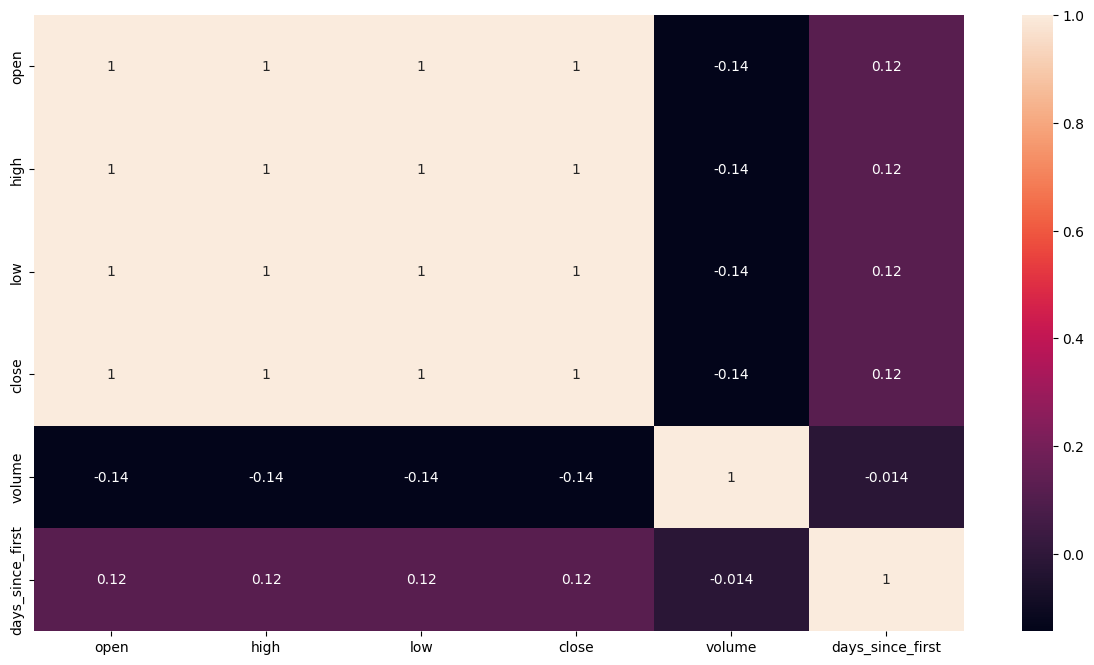

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [83]:
from sklearn.model_selection import train_test_split

X = df.drop(['close'], axis=1)
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [84]:
X_train.isnull().sum()

open                7
high                5
low                 5
volume              0
days_since_first    0
dtype: int64

In [85]:
y_train.isnull().sum()

np.int64(0)

In [87]:
len(X_train)

464280

In [88]:
len(y_train)

464280

In [98]:
## so can't drop the isnull from X_train it'll cause discrepency with the amount of rows in each, which wont allow
## the split to occur

median = X_train['open'].median()

X_train['open'] = X_train['open'].fillna(median)

In [99]:
median = X_train['high'].median()

X_train['high'] = X_train['high'].fillna(median)

In [100]:
median = X_train['low'].median()

X_train['low'] = X_train['low'].fillna(median)

In [101]:
X_train.isnull().sum()

open                0
high                0
low                 0
volume              0
days_since_first    0
dtype: int64

In [102]:
from sklearn.model_selection import train_test_split

X = df.drop(['close'], axis=1)
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression

le = LinearRegression()
le.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = le.predict(X_test)

In [108]:
from sklearn.metrics import r2_score

r2 = r2_score(y_pred, y_test)
print(r2)

0.999805334899454
